In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

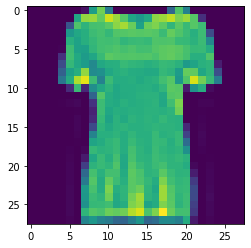

In [5]:
plt.imshow(X_train_full[10])

In [7]:
#to view category/class of data
y_train_full[0]

9

In [8]:
class_names =["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [9]:
class_names[y_train_full[10]]

'T-shirt/Top'

In [10]:
#pixels pressent in each row 0=black, 255=white, 28*28 values
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

## Data Normalization

In [11]:
#Data Normalization, so that dimensions are of approx the same scale.
#so that gradient descent reaches minimal point in short time
X_train_n= X_train_full/255.
X_test_n= X_test /255.

Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks. Training data helps these models learn over time, and the cost function within gradient descent specifically acts as a barometer, gauging its accuracy with each iteration of parameter updates.

## Split the data into train/validation/test datasets


In [12]:
#first 5000 is validation and next is train set
X_valid, X_train= X_train_n[:5000], X_train_n[5000:]
y_valid, y_train= y_train_full[:5000], y_train_full[5000:]
X_test=X_test_n

#data distribution,
Training Data(55,000)- X_train and y_train for training the data,
Validation Data(5,000)- X_valid and y_valid - for tuning model hyperparameters,
Test Data (10,000)- X_test and y_test - for testing the model performance

In [13]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## ANN USING KERAS
*sequential API (straight forward),functional API(complex and flexible)

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

random seed is used to replicate the same result everytime we can use any number in place of 42, if we use the number in future running the same code we will get the same result, in multiple occasions our nerual network generates random numbers such as assigning the initial weights, using random seed will help to reproduce the same result using the same initial weight everytime.

sequence of problem:

observation(28*28 pixel)2d array

input layer(flat 1d observation(784 pixel))

hidden layer 1 (relu activation for classification models)

Relu is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero

hidden layer 2(relu activation for classification models)

output layer (softmax activation)

The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution. That is, softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.

10 categories(exclusive one object to one category only)

In [15]:
#300=neurons
model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

2022-04-18 02:38:35.826034: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-18 02:38:35.827117: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


relu is 0 for all negative numbers & equal to input of 
all the positive inputs whereas softmaxequates the sum of all class
probablity to 1

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


 None = Batch size of input as we are passing all our data, none= no limit on input data,no of trainable parameters as we have input as 784 each variables passing through 300 diff neurons , we have individual weights for each linkage so total weights = 300*784+300(biased vairable associated with each neuron)= 235500(param#), our neural network is trying to optimize 235500 parameters for dense layer, next is 300*100+100=30100(trainable parameters.

In [17]:
weights, biases = model.layers[1].get_weights()

In [18]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

## Compliation

In [22]:
#loss= y data is in labels specific thats why sparse if class
#then no sparse, if binary then binary crossentropy for loss fun*
#sgd=gradient decent telling keras back propogation method.
#classifier have accuracy and regression have mean squared error
model.compile(loss="sparse_categorical_crossentropy", 
             optimizer="sgd", metrics=["accuracy"])

if uneven ditribution of categories class weights can be used to
give larger weight to under represented classes

In [23]:
#few more parameter are available in fit for class weights
model_history= model.fit(X_train,y_train,epochs=30,
                        validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 10s 187us/sample - loss: 0.7228 - accuracy: 0.7623 - val_loss: 0.5304 - val_accuracy: 0.8160
Epoch 2/30
55000/55000 [==============================] - 9s 172us/sample - loss: 0.4838 - accuracy: 0.8323 - val_loss: 0.4494 - val_accuracy: 0.8454
Epoch 3/30
55000/55000 [==============================] - 9s 172us/sample - loss: 0.4379 - accuracy: 0.8474 - val_loss: 0.4175 - val_accuracy: 0.8550
Epoch 4/30
55000/55000 [==============================] - 10s 180us/sample - loss: 0.4127 - accuracy: 0.8557 - val_loss: 0.3902 - val_accuracy: 0.8652
Epoch 5/30
55000/55000 [==============================] - 10s 178us/sample - loss: 0.3928 - accuracy: 0.8629 - val_loss: 0.3981 - val_accuracy: 0.8610
Epoch 6/30
55000/55000 [==============================] - 10s 175us/sample - loss: 0.3775 - accuracy: 0.8673 - val_loss: 0.3735 - val_accuracy: 0.8744
Epoch 7/30
55000/55000 [=======================

accuracy of training increases 

In [24]:
model_history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [25]:
model_history.history

{'loss': [0.722783086087487,
  0.4838255140456286,
  0.43790016883936794,
  0.41274724946022034,
  0.3928272517464378,
  0.37754050614617085,
  0.36445383715846325,
  0.3525247542467984,
  0.34125661877502095,
  0.33228410861275415,
  0.3246929395242171,
  0.3170371082262559,
  0.30925511263934047,
  0.3029133796410127,
  0.29598183673728595,
  0.2897442206924612,
  0.28330981415835294,
  0.27744076208851554,
  0.27298485701084135,
  0.2681575498505072,
  0.26270858601440084,
  0.25843009477745404,
  0.25465879146619275,
  0.24833992100845684,
  0.24517549732706764,
  0.24080953309752726,
  0.23601071797826073,
  0.23294988980293274,
  0.22866522685939616,
  0.22498560750484467],
 'accuracy': [0.76232725,
  0.8322909,
  0.8474,
  0.85565454,
  0.8628909,
  0.8673273,
  0.87134546,
  0.8741818,
  0.87914544,
  0.88150907,
  0.88405454,
  0.8862,
  0.88847274,
  0.8916364,
  0.89425457,
  0.8956364,
  0.8974364,
  0.90058184,
  0.90189093,
  0.9032364,
  0.90581816,
  0.9063454,
  0.9084

## Accuracy!

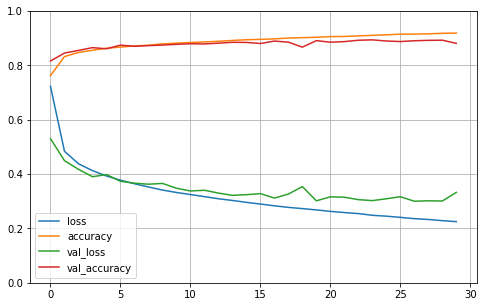

In [26]:
#how our accuracy score is changing with each epoch
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Model Evaluation

In [27]:
#accuracy of 86% better than decision trees or regression models
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3675705323696136, 0.8671]

## Predict the probablities or classes on new unseen data


In [28]:
X_new= X_test[:3]

In [29]:
#probablity of each class or class itself
#round 2 to roundoff till 2 decimal values
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

for the first record the maximum probablity is for label =10 value=0.98,for 2nd record label corresponding to 3rd object probablity is 1

In [30]:
y_pred=model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [31]:
#probablity of class itself 
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# For confirmation lets plot the image of our first new data set

AxesImage(54,36;334.8x217.44)


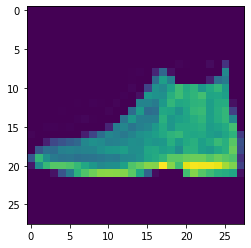

In [33]:
print(plt.imshow(X_test[0]))

yay! its an ankle boot prediction is right!!!

AxesImage(54,36;334.8x217.44)


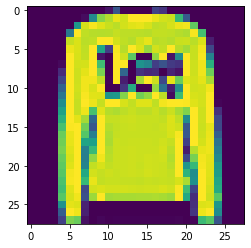

In [34]:
print(plt.imshow(X_test[1]))

yay! its a pull over prediction is right!!!

AxesImage(54,36;334.8x217.44)


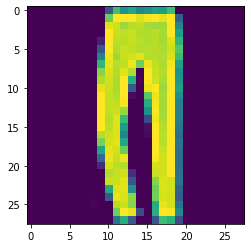

In [35]:
print(plt.imshow(X_test[2]))

yay! its an Trouser prediction is right!!!